In [30]:
# import modules needed
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn as sk
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

**1. Interacting with the data**

In [3]:
data = pd.read_csv("data.csv")
data.head(30)

,bounce_time,age,county,location
0,165.548520,16,devon,a
1,167.559314,34,devon,a
2,165.882952,6,devon,a
3,167.685525,19,devon,a
4,169.959681,34,devon,a
5,168.688747,47,devon,a
6,169.619382,7,devon,a
7,164.416273,8,devon,a
8,167.510430,8,devon,a
9,179.606068,7,devon,a


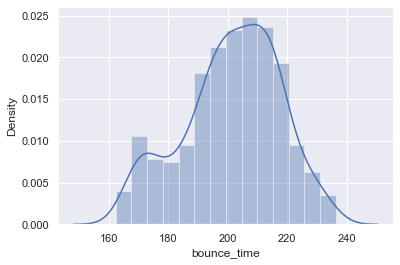

In [4]:
# plot the distribution of the bounce times - this creates the object that will be plotted when matplotlib.pyplot
sns.distplot(data.bounce_time)
plt.show()

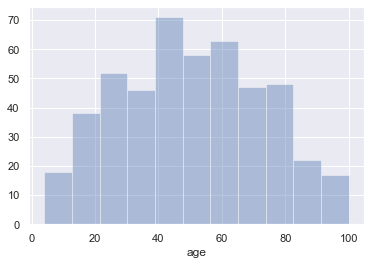

In [5]:
# plot the distribution of the ages
sns.distplot(data.age, kde=False)
plt.show()

In [6]:
# lets use the scale function from the preprocess package within sklearn
from sklearn import preprocessing
data["age_scaled"] = preprocessing.scale(data.age.values)

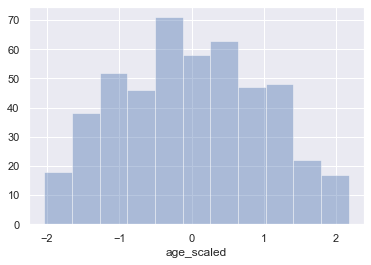

In [7]:
# plot the distribution
sns.distplot(data.age_scaled, kde=False)
plt.show()

**2. Linear Regression**

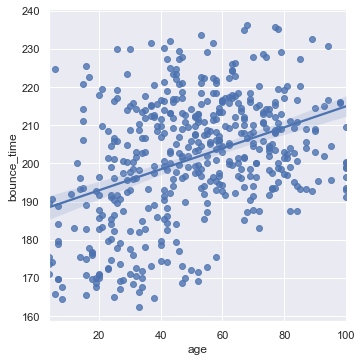

In [8]:
# let's use the lmplot function within seaborn
sns.lmplot(x = "age", y = "bounce_time", data = data)

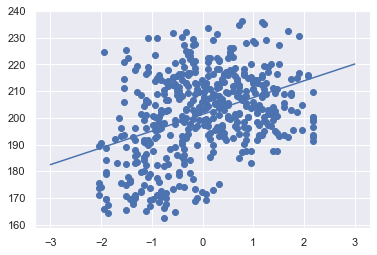

In [9]:
from sklearn.linear_model import LinearRegression
# construct our linear regression model
model = LinearRegression(fit_intercept=True)
x = data.age_scaled
y = data.bounce_time

# fit our model to the data
model.fit(x[:, np.newaxis], y)

# and let's plot what this relationship looks like
xfit = np.linspace(-3, 3, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [11]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     6.279602007970821
Model intercept: 201.31646151854164


In [13]:
# and let's store the rmse
y_predict = model.predict(x.values.reshape(-1,1))
RMSE = sqrt(((y-y_predict)**2).values.mean())

results = pd.DataFrame()
results["Method"] = ["Linear Regression"]
results["RMSE"] = RMSE
results

,Method,RMSE
0,Linear Regression,14.928334


In [15]:
#!conda install -c districtdatalabs yellowbrick
import yellowbrick
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model = model)

visualizer.fit(x[:, np.newaxis], y)  # Fit the training data to the model
visualizer.poof()                    # Draw/show/poof the data


ModuleNotFoundError: No module named 'yellowbrick'

ModuleNotFoundError: No module named 'statsmodels'

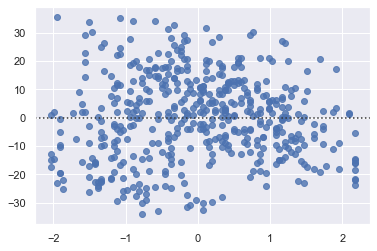

In [16]:
ax = sns.residplot(x = "age_scaled", y= "bounce_time", data = data, lowess = True)
ax.set(ylabel='Observed - Prediction')
plt.show()

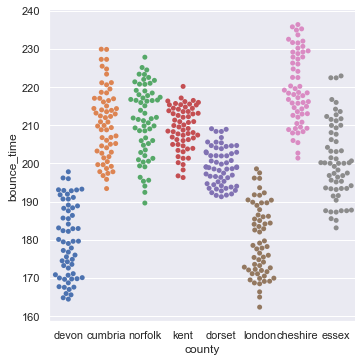

In [17]:
sns.catplot(x="county", y="bounce_time", data=data, kind = "swarm")


**3a. Separate Linear Regression**

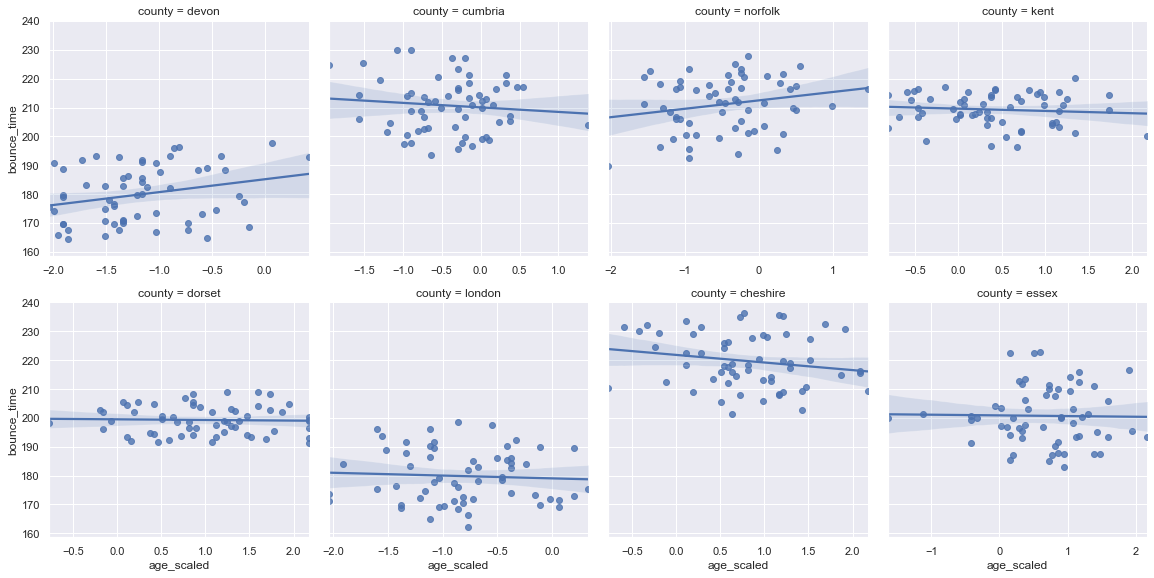

In [18]:
# let's use the lmplot function within seaborn
grid = sns.lmplot(x = "age_scaled", y = "bounce_time", col = "county", sharex=False, col_wrap = 4, data = data, height=4)

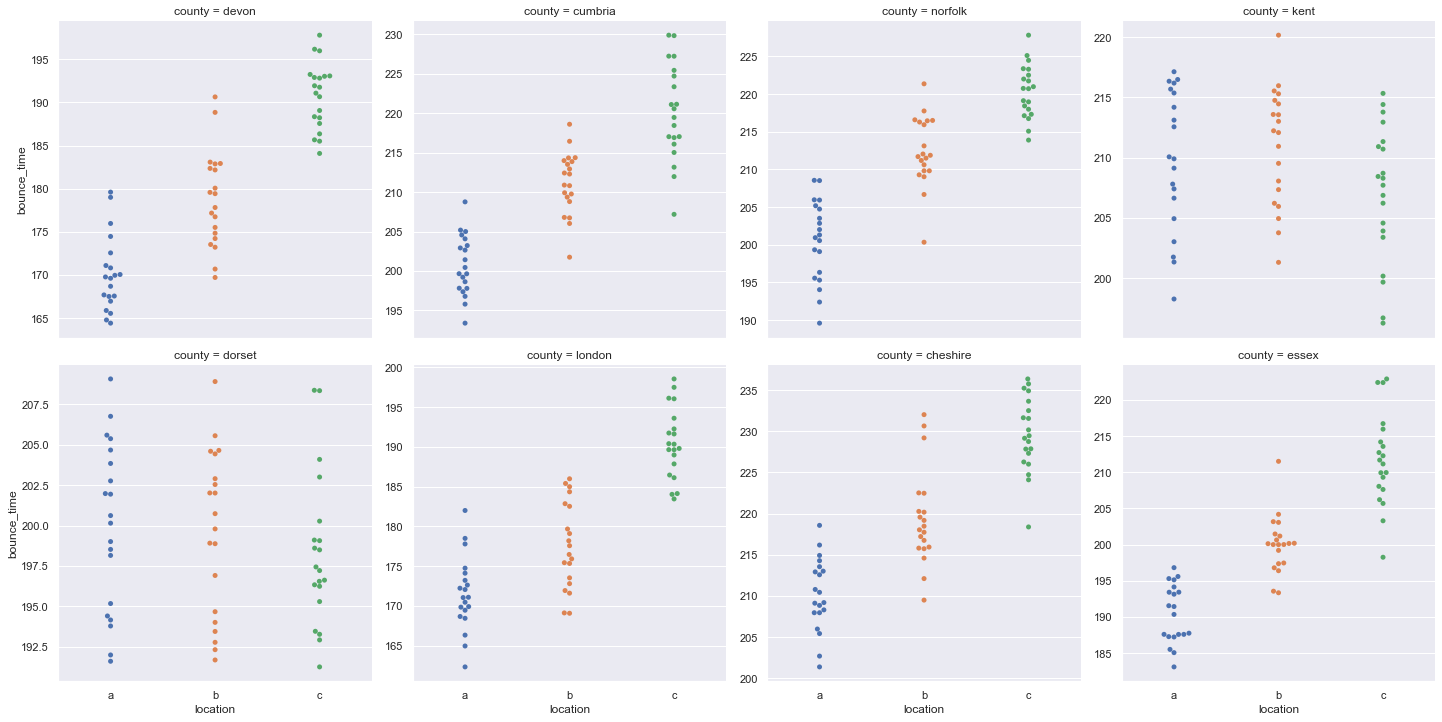

In [19]:
sns.catplot(x="location", y="bounce_time", col="county", col_wrap=4, sharey=False, data=data, kind = "swarm")


**3b. Modelling county as a fixed effect**

In [20]:
# make a new data frame with one hot encoded columns for the counties
counties = data.county.unique()
data_new = pd.concat([data,pd.get_dummies(data.county)],axis=1)
data_new.head()

,bounce_time,age,county,location,age_scaled,cheshire,cumbria,devon,dorset,essex,kent,london,norfolk
0,165.548520,16,devon,a,-1.512654,0,0,1,0,0,0,0,0
1,167.559314,34,devon,a,-0.722871,0,0,1,0,0,0,0,0
2,165.882952,6,devon,a,-1.951423,0,0,1,0,0,0,0,0
3,167.685525,19,devon,a,-1.381024,0,0,1,0,0,0,0,0
4,169.959681,34,devon,a,-0.722871,0,0,1,0,0,0,0,0


In [24]:
from matplotlib.pyplot import *
from yellowbrick.regressor import ResidualsPlot
# construct our linear regression model
model = LinearRegression(fit_intercept=True)
x = data_new.loc[:,np.concatenate((["age_scaled"],counties))]
y = data.bounce_time

# fit our model to the data
model.fit(x, y)

# and let's plot what this relationship looks like
visualizer = ResidualsPlot(model = model)
visualizer.fit(x, y)  # Fit the training data to the model
visualizer.poof()

NameError: name 'ResidualsPlot' is not defined

In [ ]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = model.predict(x) - data.bounce_time
performance["age_scaled"] = data.age_scaled
performance["predicted"] = model.predict(x)

ax = sns.residplot(x = "age_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [1]:
data_new["y_predict"] = model.predict(x)
grid = sns.lmplot(x = "age_scaled", y = "y_predict", col = "county", sharey=False, col_wrap = 4, data = data_new, height=4)
grid.set(xlim=(-3,3))

NameError: name 'model' is not defined

In [2]:
# and let's store the rmse
y_predict = model.predict(x)
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[1] = ["Fixed", RMSE]
results

NameError: name 'model' is not defined

In [3]:
# coefficient for age and the counties
pd.DataFrame.from_records(list(zip(np.concatenate((["age_scaled"],counties)), model.coef_)))

NameError: name 'pd' is not defined

**4. Mixed effects models**

In [ ]:
!conda install -c conda-forge statsmodels -y
import statsmodels.api as sm
import statsmodels.formula.api as smf

# construct our model, with our county now shown as a group
md = smf.mixedlm("bounce_time ~ age_scaled", data, groups=data["county"])
mdf = md.fit()
print(mdf.summary())


In [ ]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["age_scaled"] = data.age_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

In [ ]:
ax = sns.residplot(x = "age_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [ ]:
# and let's store the rmse
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[2] = ["Mixed", RMSE]
results

In [ ]:
# construct our model, but this time we will have a random interecept AND a random slope with respect to age
md = smf.mixedlm("bounce_time ~ age_scaled", data, groups=data["county"], re_formula="~age_scaled")
mdf = md.fit()
print(mdf.summary())

In [ ]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["age_scaled"] = data.age_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)


In [ ]:
ax = sns.residplot(x = "age_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [ ]:
# and let's store the rmse
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
results.loc[3] = ["Mixed_Random_Slopes", RMSE]
results

